# Cellular Automata
We will begin exploring this topic by following in the footsteps of Stephen Wolfram, the creator of Mathematica, in discovering chaos within simple systems based on cells and rules that govern their interaction. In his [elementary cellular automation](https://en.wikipedia.org/wiki/Elementary_cellular_automaton), a 1D set of cells evolve to the next generation based solely on the current state of each cell and rules based on its neighbours.

We begin by defining a 1D array to represent the current state of cells and then the rules that evolve the cells to the next generation based on neighbours.

In [87]:
import numpy as np

iterations = 120 # total iterations to compute
N = 3 #initial size
cells = np.zeros(N)
cells[int(N/2)] = 1 #start point in middle

We define the rules for the automation ([Rule 30](https://en.wikipedia.org/wiki/Rule_30)) as a dictionary for lookup. We use a string system to conform to the notation used in the literature.

In [88]:
rules = {"111": '0', "110": '0', "101": '0', "000": '0',"100": '1', "011": '1', "010": '1', "001": '1'}

For every cell, apply the rules to create the next generation.

In [89]:
def evolveCells(cells, rules):
    '''
    Compute a single iteration elementary cellular automation given the rules provided.
    Rules are assumed to be a binary string dictionary.
    '''
    N = cells.size
    M = N+2
    new_cells = np.zeros(M) #assume the cells grow
    pad_cells = np.zeros(M) #assume the cells grow
    pad_cells[1:M-1] = cells
    #print(new_cells)
    for index, cell in enumerate(cells):
        pad_index = index+1 #refer to position of cell index in new_cell array
        #convert neighbour to binary string
        neighbourhood = ""
        if pad_cells[pad_index-1] == 1:
            neighbourhood += '1'
        else:
            neighbourhood += '0'
        if pad_cells[pad_index] == 1:
            neighbourhood += '1'
        else:
            neighbourhood += '0'
        if pad_cells[pad_index+1] == 1:
            neighbourhood += '1'
        else:
            neighbourhood += '0'
        #print(neighbourhood)
        #determine new state of current cell
        new_state = rules[neighbourhood]
        #print(new_state)
        #apply state
        if new_state == '1':
            new_cells[pad_index] = 1
        else:
            new_cells[pad_index] = 0
            
    return new_cells

In [90]:
states = [] #save each state compute, not efficient but simple
maxLength = -1
for iteration in range(iterations):
    new_cells = evolveCells(cells, rules)
    cells = new_cells
    states.append(cells)
    if maxLength < cells.size:
        maxLength = cells.size
    #print(cells)

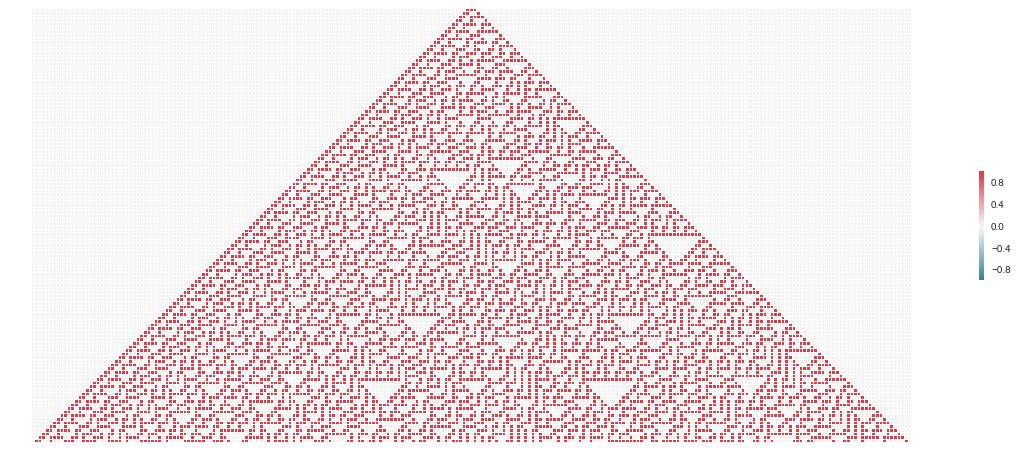

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

n = len(states)
lattice = np.zeros((n,maxLength))
for index, state in enumerate(states):
    #copy each state to the center of the row in lattice used for plot
    left_bound = int(maxLength/2)-int(state.size/2)
    right_bound = int(maxLength/2)+int(state.size/2)+1
    lattice[index, left_bound:right_bound] = state
    
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(lattice, cmap=cmap, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .25})

plt.axis('off')
plt.show()